In [35]:
#reading an excel file of adult analysis data and producing/saving the following plots

In [1]:
data_path = '/home/tli_project/Desktop/Data/controls/adult_1/output/adult_T4_results_Nov_2022_2.csv'
save_path = '/home/tli_project/Desktop/Data/controls/adult_1/output/fig1_nov/'
boxplots_to_do = ['volume', 'density_2D', 'area', 'PCA_elongation',
                    'convexity_2D', 'AP_spread', 'DV_spread', 'compactness', 'convexity_2D', 'convexity_3D',
                    'ellipticity', 'px_variance', 'px_std', 'DGI', 'DGI_angle'
                    # 'DV_cent_dens_asym', 'AP_cent_dens_asym', 'DV_EP_dens_asym', 'AP_EP_dens_asym',
                    'DV_asymmetry', 'AP_asymmetry',
                    'ellipticity', 'orientation']
polarplots_to_do = ['cen_EP_angle']
# viloin_plots_to_do = ['eccentricity', 'elipse_elongation', 'PCA_elongation']
# line_plots_to_do = ['PCA_xy','PCA_shift_centroid']

In [2]:
# plotting settings
Colors = {'A':'b','B':'g','C':'orange','D':'r'}
x_p = {'A':0,'B':1,'C':2,'D':3}
plot_order = ['A', 'B', 'C', 'D']

In [3]:
from tqdm import tqdm
import os
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [4]:
results_df = pd.read_csv(data_path, index_col=0)

In [48]:
results_df.head()

,neuron,subtype,entry_point,volume,3D_convex_volume,net_area,area,AP_spread,DV_spread,eccentricity,...,yN_scale,yN_angle,yN_xy,PC1_angle,PC1_x,PC1_y,PC1_shift_centroid_y,PC1_shift_centroid_x,DGI,DGI_angle
0,T4-02,A,[ 11 347 337],251.484730,691.678310,86.524480,161.520064,11.096,20.292,0.881249,...,-112.013844,-279.687679,"(0.07241650660220049, -0.4242032610257114)",9.687679,39.345902,6.716810,4.393955,21.897530,0.337525,-0.404360
1,T4-03,D,[ 22 651 367],251.121997,1141.665677,98.365280,223.837328,12.084,25.536,0.911586,...,-246.534458,-266.747302,"(-7.3624309385526585, -129.54873749074792)",266.747302,-7.362431,-129.548737,-83.913180,-6.347305,0.804685,1.732679
2,T4-04,B,[ 18 569 625],430.827219,1485.751238,122.335680,250.378048,12.692,26.752,0.917823,...,-205.685251,-271.955341,"(0.5243854677985635, -15.35968077271772)",181.955341,-104.214334,-3.557918,-16.921709,-47.908153,0.562011,2.875716
3,T4-05,D,[ 10 666 452],393.678298,1830.894963,127.805552,296.216384,15.732,27.892,0.907827,...,-282.230528,-261.309100,"(-23.435768901607982, -153.31628500324416)",261.309100,-23.435769,-153.316285,-97.301438,-15.992373,0.848254,1.869408
4,T4-06,D,[ 15 441 368],388.683213,1617.841427,120.677968,249.806224,11.780,27.892,0.923139,...,-259.251018,-260.571119,"(-19.850616474093734, -119.53388623792972)",260.571119,-19.850616,-119.533886,-82.372158,0.870859,0.801640,1.715846


KeyError: 'DGI_angleDV_asymmetry'

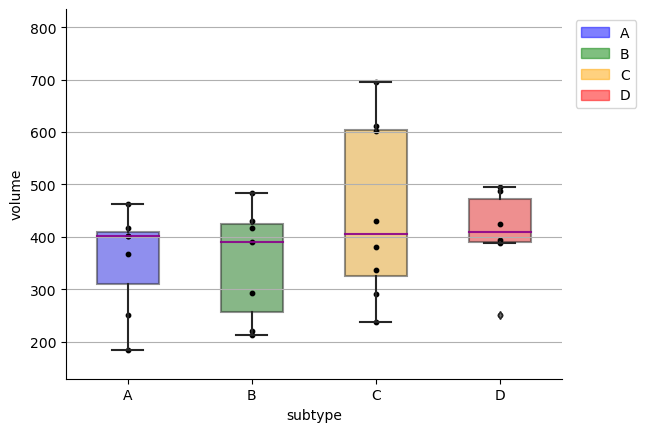

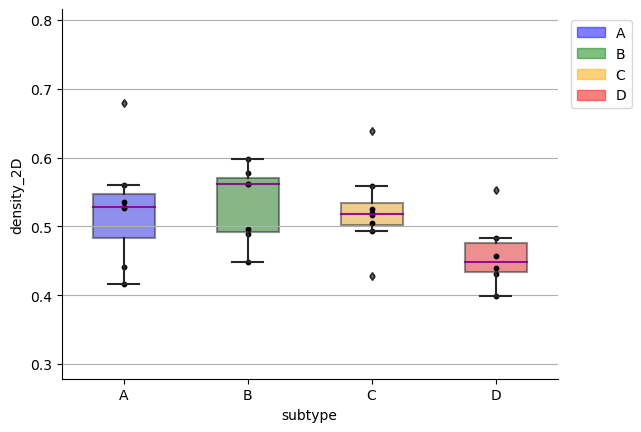

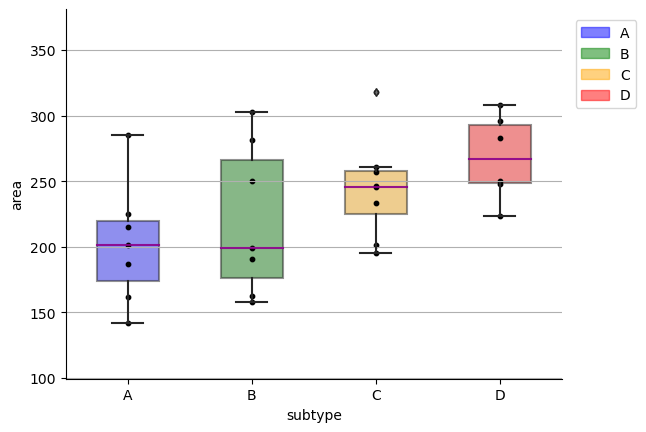

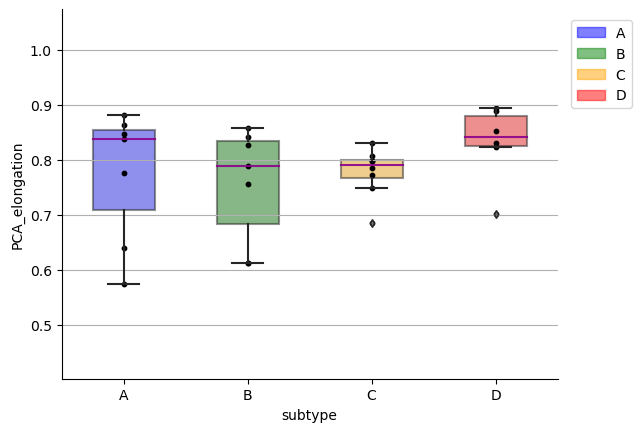

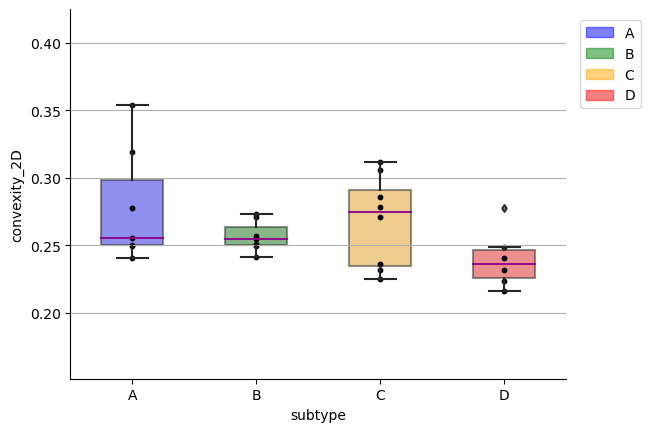

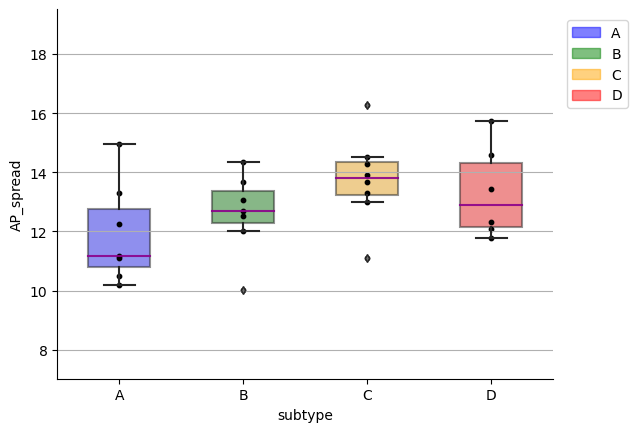

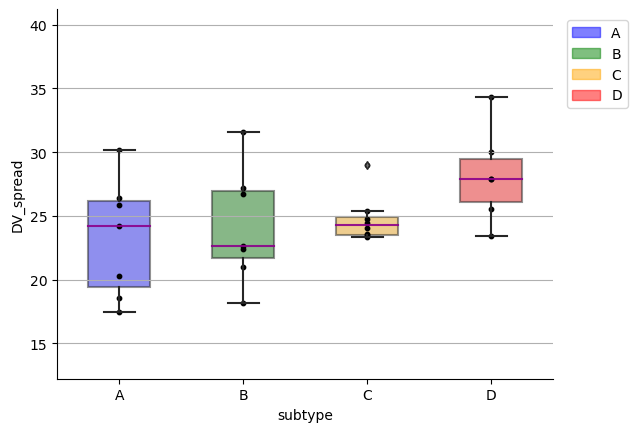

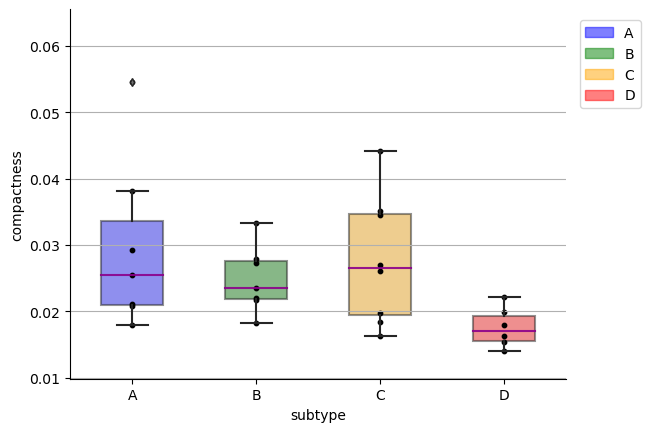

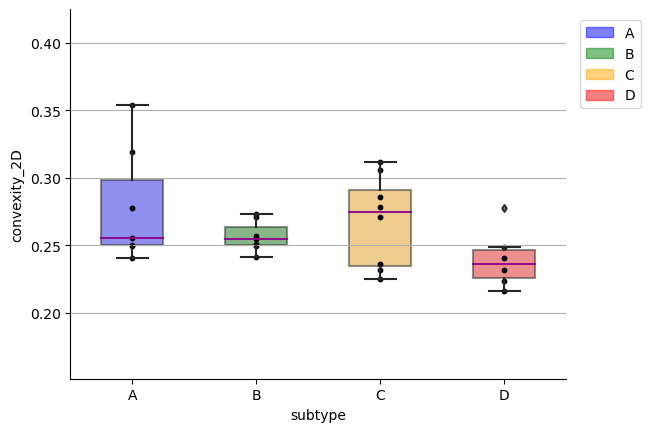

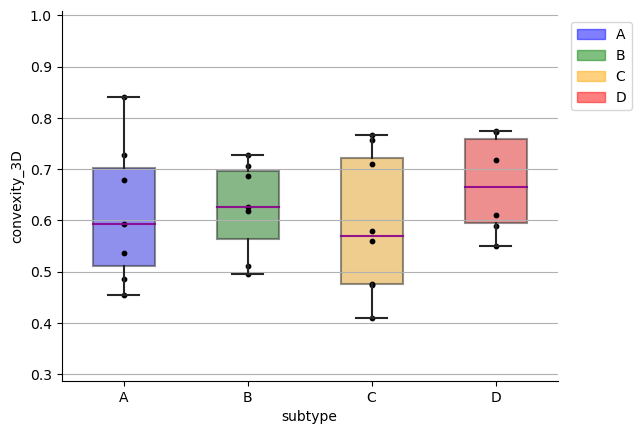

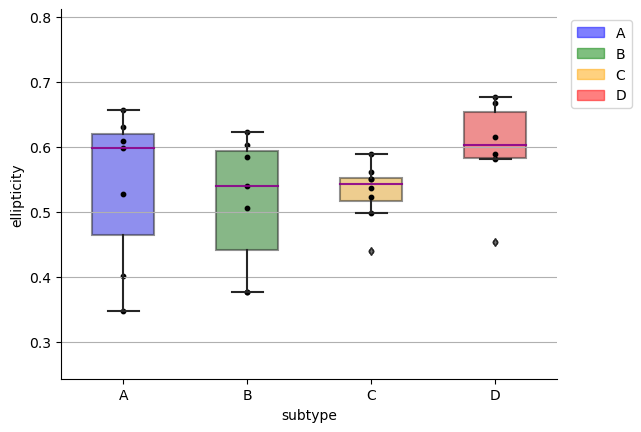

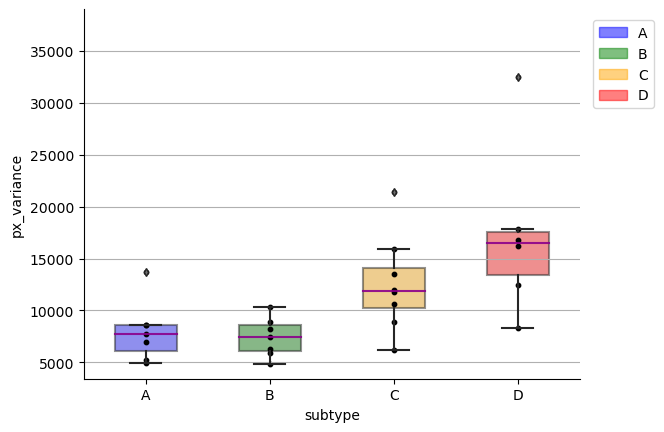

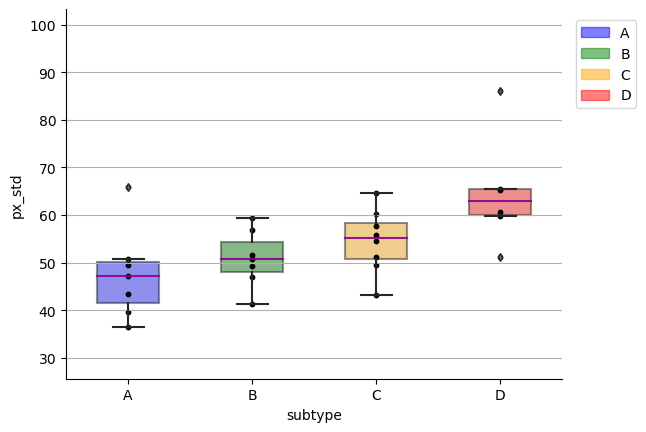

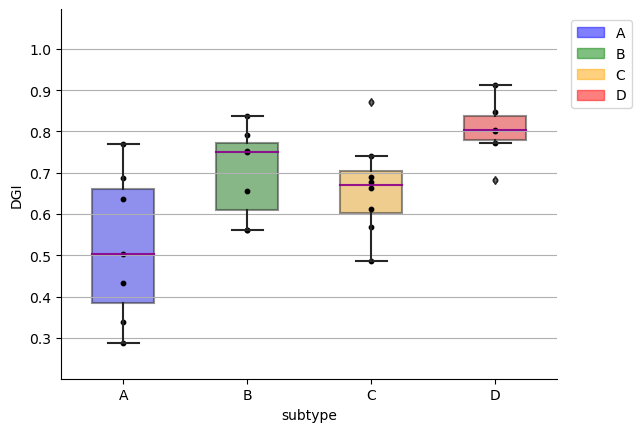

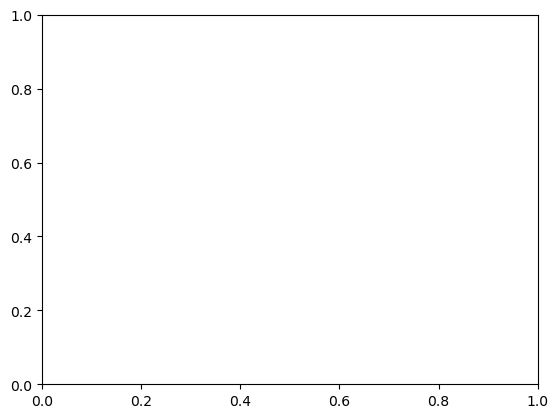

In [42]:
for plot_col in boxplots_to_do:
    fig, ax = plt.subplots(1)
    for i,neu in enumerate(results_df[plot_col]):
        ax.scatter(x_p[results_df.subtype[i]],neu,c='k', marker='o', s=10)

    sns.boxplot(data=results_df , x='subtype', y=plot_col, 
                order=plot_order, width=0.5, 
                palette=Colors, boxprops=dict(alpha=.5),
                medianprops=dict(color="darkmagenta", alpha=.9),
                flierprops=dict(markerfacecolor="#707070", marker="d", markersize=4),
                zorder=10)

    # ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    # ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    if results_df[plot_col].min() > 0:
        ax.set_ylim(0.7*results_df[plot_col].min(),1.2*results_df[plot_col].max())
    else:
        ax.set_ylim(2*results_df[plot_col].min(),1.2*results_df[plot_col].max())

    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [ ]:
    fig, ax = plt.subplots(1)
    for i,neu in enumerate(results_df[plot_col]):
        ax.scatter(x_p[results_df.subtype[i]],neu,c='k', marker='o', s=10)

    sns.boxplot(data=results_df , x='subtype', y=plot_col, 
                order=plot_order, width=0.5, 
                palette=Colors, boxprops=dict(alpha=.5),
                medianprops=dict(color="darkmagenta", alpha=.9),
                flierprops=dict(markerfacecolor="#707070", marker="d", markersize=4),
                zorder=10)

    # ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    # ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    if results_df[plot_col].min() > 0:
        ax.set_ylim(0.7*results_df[plot_col].min(),1.2*results_df[plot_col].max())
    else:
        ax.set_ylim(2*results_df[plot_col].min(),1.2*results_df[plot_col].max())

    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

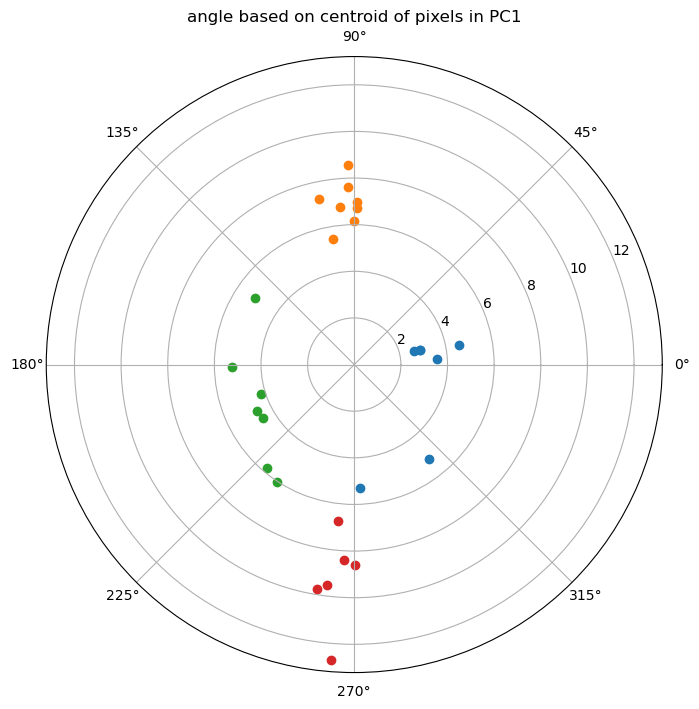

In [57]:
Colors = {'A':"tab:blue",'B':"tab:green",'C':"tab:orange",'D':"tab:red"}

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection = 'polar')

for i, neu in results_df.iterrows():
    y, x = neu.PC1_cen_y, neu.PC1_cen_x
    y, x = float(y[2:-2]), float(x[2:-2])
    # print(type(y), y, x)
    rad = np.arctan2(y,x)
    # rad = math.radians(neu.PC1_angle2)
    dist = np.linalg.norm((y,x))*0.076
    c = Colors[neu.subtype]
    # print(neu.subtype, y, x, rad)
    ax.scatter(rad,dist, color=c)
ax.grid(True)
plt.title('angle based on centroid of pixels in PC1')

plot_name = 'cen_EP_PCA_angle'+'_in_adult_T4_dendrites.pdf'
# plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [5]:
# plotting columns occupancies
data_path = '/home/tli_project/Desktop/Data/controls/adult_columns/adult_cols_occupancies/T4_adult_cols_occupanies.csv'
save_path = '/home/tli_project/Desktop/Data/controls/adult_columns/adult_cols_occupancies/'

results_df = pd.read_csv(data_path, index_col=0)

# for i, neu in results_df.loc[:,list(results_df.columns)[2:]].iterrows():
#     results_df.loc[i,list(results_df.columns)[2:]] = neu/neu.sum()

In [6]:
results_df.head()

,subtype,neruon,"0,0","0,-1","-1,-1","-1,0","-1,1","-2,0","-2,1","-2,-1",...,"2,1","2,2","0,3","1,3","2,3","-2,-2","-1,2","3,2","1,-2","-2,2"
0,B,T4-11,12961,4785,10392,24468,8271,12780,10658,1829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,T4-12,27182,10182,7076,3470,2114,0,0,0,...,771.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B,T4-13,20932,10339,10671,22323,9842,5868,208,2967,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,T4-15,12058,32,0,0,0,0,0,0,...,6840.0,372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C,T4-16,30711,21707,9441,259,0,0,0,0,...,1844.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
sub_A = results_df[results_df.subtype=='D']
for cc in sub_A.iloc[:,2:]:
    if sub_A[cc].sum() == 0:
        del sub_A[cc]
for i, neu in sub_A.iterrows():
    sub_A.loc[i,2:] = neu[2:]/neu[2:].sum()


/home/tli_project/miniconda3/envs/plotting/lib/python3.9/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/tli_project/miniconda3/envs/plotting/lib/python3.9/site-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [113]:
col_value = sub_A.mean(axis=0)

/tmp/ipykernel_476818/2025441557.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  col_value = sub_A.mean(axis=0)


In [114]:
sub_A.std(axis=0)

/tmp/ipykernel_476818/199801746.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sub_A.std(axis=0)


0,0      0.054558
0,-1     0.046633
-1,-1    0.015839
-1,0     0.072660
-1,1     0.055791
-2,0     0.047294
-2,1     0.039139
-2,-1    0.002033
-1,-2    0.010842
0,1      0.071063
0,2      0.077822
1,-1     0.015390
1,0      0.023975
1,1      0.021061
1,2      0.065407
2,1      0.002196
2,2      0.001779
0,3      0.005162
1,3      0.024250
2,3      0.008416
-1,2     0.004235
-2,2     0.000389
dtype: float64

In [81]:
col_value = col_value/col_value.max()

ValueError: Invalid RGBA argument: 0.41918706319648574

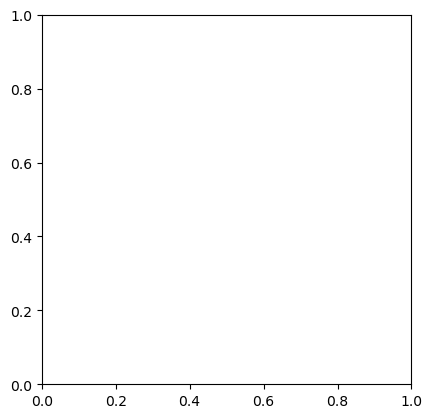

In [118]:
import matplotlib as mpl
from matplotlib.patches import RegularPolygon
import matplotlib.cm as cm
#These are values not to be changed
r_ = [2,3] # give two numbers for definning the radius

col_coor = {'0,0': [0,0], '0,1': [0,2], '-1,0': [-1,1], '-1,-1': [-1,-1],
            '-1,-2': [-1,-3], '-1,1': [-1,3], '-1,2': [-1,5],
            '0,-1': [0,-2], '1,1': [1,1], '1,0': [1,-1], #until here is the inner ring
            '0,2': [0,4], '0,3': [0,6], '0,-2': [0,-4], '1,2': [1,3],
            '1,-2': [1,-5], '1,3': [1,5], '1,-1': [1,-3],
            '2,0': [2,-2], '2,1': [2,0], '2,2': [2,2],
            '2,3': [2,4], '2,-1': [2,-4],
            '-2,0': [-2,2], '-2,-1': [-2,0],
            '-2,-2': [-2,-2], '-2,1': [-2,4],
            '-2,2': [-2,6], '3,2': [3,1],}

# data = {'col' : col_coor.keys(),'coor' : col_coor.values()}
# col_coor = pd.DataFrame(data=data)

vmin, vmax= 0, 0.5
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
p = plt.get_cmap('hot_r')

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for col, col_val in col_coor.items():
        # coor = row[1]
        X = col_val[0]
        Y = r_[0] * np.sin(np.radians(60)) * (col_val[1]) /r_[1]
        hexagon = RegularPolygon((X,Y), orientation = np.radians(30), 
                                numVertices=6, radius=r_[0]/r_[1], 
                                facecolor='k',
                                alpha=0.1, 
                                linewidth=2,
                                edgecolor='k')
        try:
                color = p(col_value[col])
        except:
                color = p(0)
        circle = plt.Circle((X,Y), np.sqrt(1/10), 
                                facecolor=color, alpha=1, edgecolor="k", linewidth=0.5)
                                # linewidth=3, edgecolor='k')
        if col in col_value.keys():
                ax.add_patch(hexagon)
                ax.add_patch(circle)
                ax.text(X, Y + 0.45, col, ha ='center',
                        va ='center', size = 12, color='blue') #adding col_name
                # val_str = '%.2f' % col_value[col]
                # ax.text(X, Y - 0.45, val_str, ha ='center',
                #         va ='center', size = 12, color='k')
ax.text(0, 0 - 0.45, 'EC', ha ='center',
        va ='center', size = 12, color='blue') #adding col_name

plt.autoscale(enable = True)
sns.despine(left=True, bottom=True)
plt.tick_params(# axis='x', # changes apply to the x-axis
                which='both', # both major and minor ticks are affected
                bottom=False, # ticks along the bottom edge are off
                left=False,
                labelbottom=False,
                labelleft=False) # labels along the bottom edge are off

fig.colorbar(cm.ScalarMappable(norm=norm, cmap=p), ax=ax)

plt.plot([0,0],[0,3],c='w',alpha=0)
plt.plot([0,3],[0,0],c='w',alpha=0)
### saving the plot
# plt.savefig(save_path+save_name, bbox_inches='tight')

In [103]:
for col, val in col_coor.items():
    X, Y = col.split(',')
    X, Y = int(X), int(Y)
    print(col, val, r_[0] * np.sin(np.radians(60)) * (Y) /r_[1])

0,0 [0, 0] 0.0
0,1 [0, 2] 0.5773502691896256
-1,0 [-1, 1] 0.0
-1,-1 [-1, -1] -0.5773502691896256
-1,-2 [-1, -3] -1.1547005383792512
-1,1 [-1, 3] 0.5773502691896256
-1,2 [-1, 5] 1.1547005383792512
0,-1 [0, -2] -0.5773502691896256
1,1 [1, 1] 0.5773502691896256
1,0 [1, -1] 0.0
0,2 [0, 4] 1.1547005383792512
0,3 [0, 6] 1.732050807568877
0,-2 [0, -4] -1.1547005383792512
1,2 [1, 3] 1.1547005383792512
1,-2 [1, -5] -1.1547005383792512
1,3 [1, 5] 1.732050807568877
1,-1 [1, -3] -0.5773502691896256
2,0 [2, -2] 0.0
2,1 [2, 0] 0.5773502691896256
2,2 [2, 2] 1.1547005383792512
2,3 [2, 4] 1.732050807568877
2,-1 [2, -4] -0.5773502691896256
-2,0 [-2, 2] 0.0
-2,-1 [-2, 0] -0.5773502691896256
-2,-2 [-2, -2] -1.1547005383792512
-2,1 [-2, 4] 0.5773502691896256
-2,2 [-2, 6] 1.1547005383792512
3,2 [3, 1] 1.1547005383792512


In [96]:
X

3

In [10]:
sub_A.sum(axis=1)

/tmp/ipykernel_476818/2954210381.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sub_A.sum(axis=1)


3     1.0
7     1.0
10    1.0
11    1.0
17    1.0
21    1.0
23    1.0
dtype: float64

In [112]:
i

7

In [66]:
sub_A = results_df[results_df.subtype=='A']
sub_A[] = sub_A.loc[sub_A>0]

TypeError: '>' not supported between instances of 'str' and 'int'

In [69]:
sub_A.loc[(sub_A.sum(axis=1) != 0)]

/tmp/ipykernel_466341/703398609.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sub_A.loc[(sub_A.sum(axis=1) != 0)]


,subtype,neruon,"0,0","0,-1","-1,-1","-1,0","-1,1","-2,0","-2,1","-2,-1",...,"2,1","2,2","0,3","1,3","2,3","-2,-2","-1,2","3,2","1,-2","-2,2"
3,A,T4-15,12058,32,0,0,0,0,0,0,...,6840.0,372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A,T4-2,18816,9486,61,0,0,0,0,0,...,1735.0,4598.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
10,A,T4-25,36113,4112,0,6662,5220,0,0,0,...,1979.0,865.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
11,A,T4-26,20199,5855,0,0,0,0,0,0,...,18721.0,9183.0,0.0,0.0,0.0,0.0,0.0,1698.0,NaN,NaN
17,A,T4-35,45301,5534,0,20133,9221,0,0,0,...,3995.0,812.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
21,A,T4-40,23238,13946,0,0,0,0,0,0,...,10517.0,6656.0,0.0,0.0,5373.0,0.0,0.0,0.0,0.0,0.0
23,A,T4-43,16148,4967,0,0,0,0,0,0,...,12121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
data_columns = ['neuron', 'subtype', 'high','major', 'medium', 'minor']
data = pd.DataFrame(columns=data_columns)
for i, neu in results_df.iterrows():
    neu_line = {'neuron':neu['neruon'], 
                'subtype':neu['subtype'],
                'high': len(neu[2:][neu[2:]>0.25]),
                'major': len(neu[2:][(neu[2:]<=0.25) & (neu[2:]>0.15)]),
                'medium': len(neu[2:][(neu[2:]<=0.15) & (neu[2:]>0.05)]),
                'minor': len(neu[2:][(neu[2:]<=0.05) & (neu[2:]>0.01)])}
    data.loc[i] = neu_line
    


In [101]:
data

,neuron,subtype,high,major,medium,minor
0,T4-11,B,1,1,5,1
1,T4-12,C,1,1,5,3
2,T4-13,B,1,1,4,3
3,T4-15,A,1,2,3,1
4,T4-16,C,0,3,3,6
5,T4-18,C,1,2,3,4
6,T4-19,D,0,2,4,6
7,T4-2,A,1,2,3,3
8,T4-21,B,0,2,5,3
9,T4-24,B,0,3,3,4


In [116]:
results_df[2:][results_df.subtype=='D'].mean(axis=0)

/tmp/ipykernel_303781/1500633101.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df[2:][results_df.subtype=='D'].mean(axis=0)
/tmp/ipykernel_303781/1500633101.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  results_df[2:][results_df.subtype=='D'].mean(axis=0)


0,0      33676.500000
0,-1     18097.166667
-1,-1     4566.000000
-1,0     14901.000000
-1,1     14598.333333
-2,0      5499.333333
-2,1      4637.333333
-2,-1      129.000000
-1,-2      770.833333
0,-2         0.000000
0,1      30746.333333
0,2      11542.000000
1,-1       967.833333
1,0       3147.833333
1,1       6109.833333
1,2       9961.166667
2,-1         0.000000
2,0          0.000000
2,1         93.166667
2,2        135.833333
0,3        523.166667
1,3       2432.666667
2,3        838.666667
-2,-2        0.000000
-1,2       529.600000
3,2          0.000000
1,-2         0.000000
-2,2        40.250000
dtype: float64

In [84]:
results_df.iloc[:,2:].max()

0,0      0.293579
0,-1     0.243869
-1,-1    0.290273
-1,0     0.286546
-1,1     0.232776
-2,0     0.148356
-2,1     0.162541
-2,-1    0.037766
-1,-2    0.144675
0,-2     0.057566
0,1      0.271470
0,2      0.182906
1,-1     0.142082
1,0      0.390602
1,1      0.251715
1,2      0.126953
2,-1     0.017327
2,0      0.085391
2,1      0.118793
2,2      0.058270
0,3      0.012717
1,3      0.060268
2,3      0.030889
-2,-2    0.064816
-1,2     0.040046
3,2      0.010775
1,-2     0.012034
-2,2     0.000777
dtype: float64

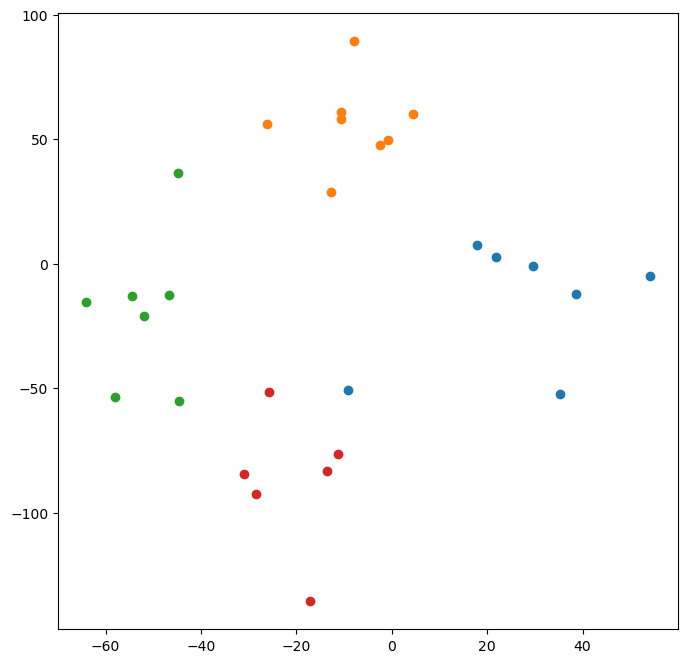

In [129]:
# import math

Colors = {'A':"tab:blue",'B':"tab:green",'C':"tab:orange",'D':"tab:red"}

plt.figure(figsize=(8,8))
# ax = plt.subplot(111, projection = 'polar')

for i, neu in results_df.iterrows():
    c = Colors[neu.subtype]
    plt.scatter(neu.cen_EP_x,neu.cen_EP_y,c=c)

In [ ]:
# To plot x,y value of one metric for individual neurons, colored by subtype
fig, ax = plt.subplots(1)
col_vals = results_df[plot_col]
for i in ['(',')','[',']']:
    col_vals = col_vals.str.replace(i,'')
col_vals = col_vals.str.split(',')
for i, val in col_vals.items():
    col_vals[i] = [float(n) for n in val]
for i,neu in enumerate(col_vals):
    ax.plot((0,neu[0]),(0,neu[1]),c=Colors[results_df.subtype[i]])

# ax.set_ylim(1.2*y_vals.str[1].min(),1.2*y_vals.str[1].max())
# ax.set_xlim(1.2*y_vals.str[0].min(),1.2*y_vals.str[0].max())

ax.set_ylim(-250,250)
ax.set_xlim(-250,250)

ax.set_title(plot_col+' in adult T4 dendrites')
ax.set_xlabel(plot_col+'_x')
ax.set_ylabel(plot_col+'_y')
sns.despine()

legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})

ax.set_aspect('equal', 'box')
fig.tight_layout()
plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

NameError: name 'x_p' is not defined

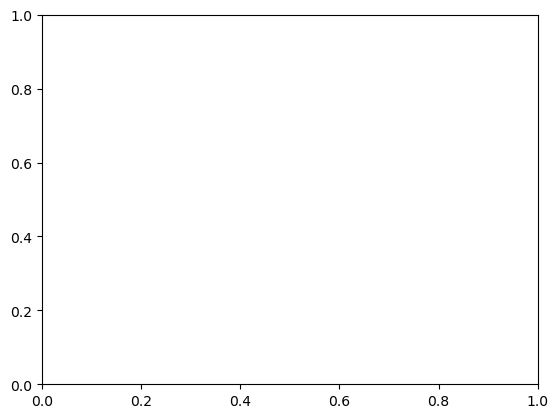

In [8]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    # y_vals = results_df.convexity_3D
    for neu,color in Colors.items():
        subset = results_df[plot_col][results_df.subtype==neu]
        violin_parts =  ax.violinplot(subset, positions=[x_p[neu]], vert=True, widths=0.5, 
                                    showmeans=False, showextrema=True, showmedians=False, 
                                    quantiles=[0.5], bw_method=None)
        # for pc in violin_parts['bodies']:
        #     pc.set_facecolor(color)
        #     pc.set_edgecolor(color)

    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

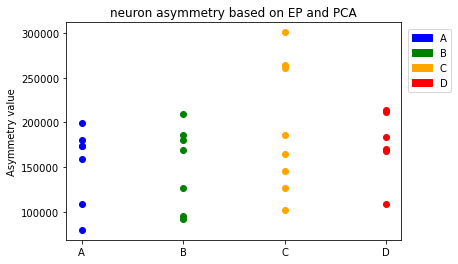

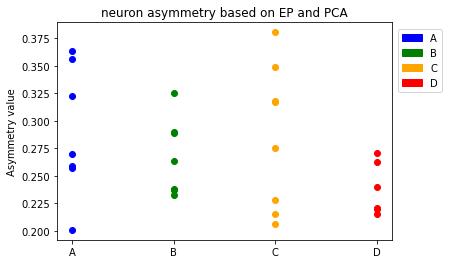

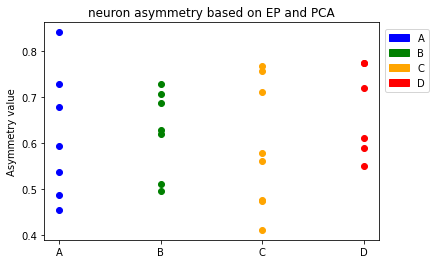

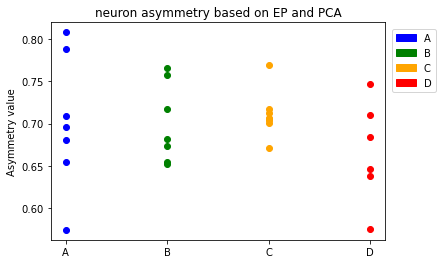

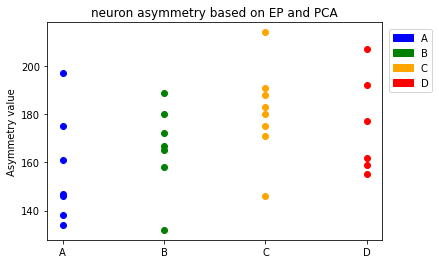

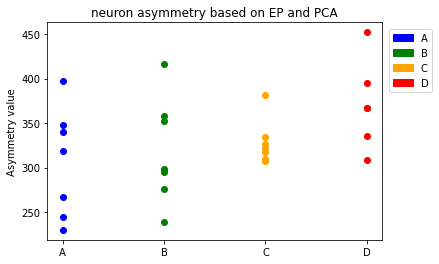

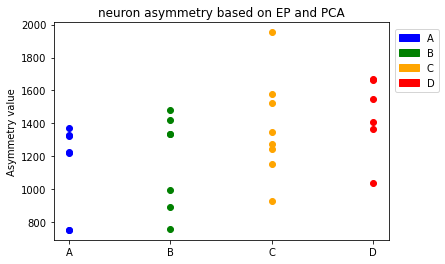

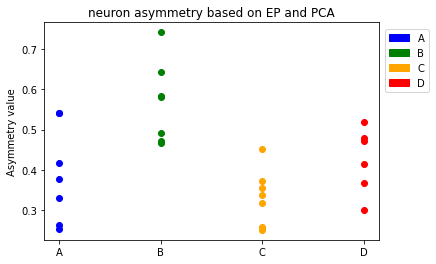

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    colors = {'A':'b','B':'g','C':'orange','D':'r'}
    x_p = {'A':1,'B':2,'C':3,'D':4}
    y_vals = results_df[plot_col]
    for i,neu in enumerate(y_vals):
        ax.scatter(x_p[results_df.subtype[i]],neu,c=colors[results_df.subtype[i]])
    
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    # plt.savefig(save_path+'adult_T4_Asymmetry.png', facecolor='white', transparent=False)

/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')
/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')


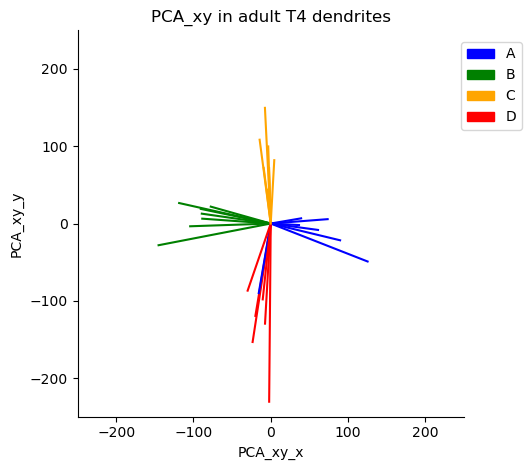

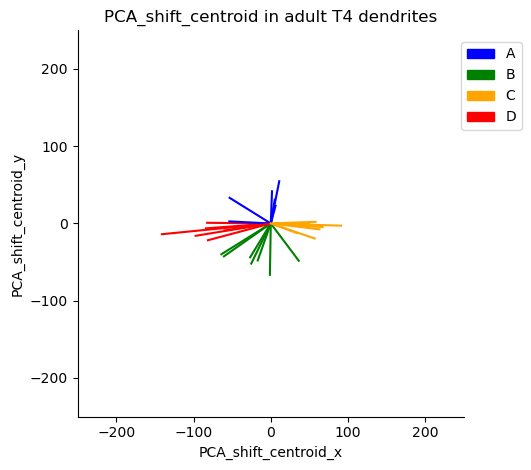

In [9]:
# To plot x,y value of one metric for individual neurons, colored by subtype
for plot_col in line_plots_to_do:
    fig, ax = plt.subplots(1)
    col_vals = results_df[plot_col]
    for i in ['(',')','[',']']:
        col_vals = col_vals.str.replace(i,'')
    col_vals = col_vals.str.split(',')
    for i, val in col_vals.items():
        col_vals[i] = [float(n) for n in val]
    for i,neu in enumerate(col_vals):
        ax.plot((0,neu[0]),(0,neu[1]),c=Colors[results_df.subtype[i]])
    
    # ax.set_ylim(1.2*y_vals.str[1].min(),1.2*y_vals.str[1].max())
    # ax.set_xlim(1.2*y_vals.str[0].min(),1.2*y_vals.str[0].max())

    ax.set_ylim(-250,250)
    ax.set_xlim(-250,250)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.set_xlabel(plot_col+'_x')
    ax.set_ylabel(plot_col+'_y')
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})

    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

In [ ]:


# Example Python Program to plot a polar plot of a circle

# import the numpy and pyplot modules
import numpy as np
import matplotlib.pyplot as plot

plot.axes(projection='polar')

# Set the title of the polar plot
plot.title('Circle in polar format:r=R')

# Plot a circle with radius 2 using polar form
rads = np.arange(0, (2*np.pi), 0.01)

for radian in rads:
    plot.polar(radian,2,'o') 

# Display the Polar plot
plot.show()